In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
np.shape(x_train)

(60000, 28, 28)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train = np.expand_dims(x_train, axis=3)

In [8]:
np.shape(x_train)

(60000, 28, 28, 1)

In [9]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
x_test = np.expand_dims(x_test, axis=3)

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [13]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
history = model.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 23s 113ms/step - loss: 0.3016 - accuracy: 0.9119 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 2/5
200/200 [==============================] - 25s 125ms/step - loss: 0.0700 - accuracy: 0.9789 - val_loss: 0.0508 - val_accuracy: 0.9829
Epoch 3/5
200/200 [==============================] - 23s 115ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0356 - val_accuracy: 0.9873
Epoch 4/5
200/200 [==============================] - 23s 116ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0351 - val_accuracy: 0.9871
Epoch 5/5
200/200 [==============================] - 23s 115ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0309 - val_accuracy: 0.9893


<AxesSubplot:>

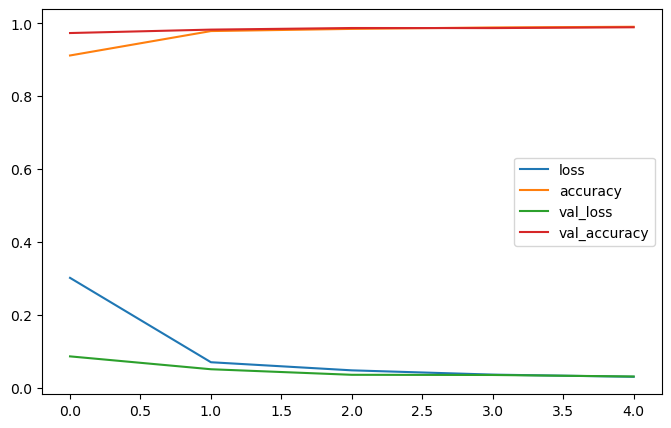

In [17]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [19]:
# MasoudKaviani.ir